## Ejercicio de Regresión 1 (Core) de Elida Peña


**Objetivo**

 Aplicar los conceptos de regresión lineal para resolver un problema práctico utilizando Python.

 **Descripción del problema:** Supongamos que trabajas en una empresa que desea predecir el precio de venta de casas en función de varias características. Tienes un conjunto de datos con información sobre las casas, incluyendo el tamaño de la casa (en pies cuadrados), el número de habitaciones, el número de baños y la antigüedad de la casa (en años). Tu tarea es construir un modelo de regresión lineal que pueda predecir el precio de venta de una casa dada.

**Instrucciones:**

**1. Carga de datos:** Descarga el archivo de datos house_prices.csv que contiene las siguientes columnas:

* SqFt: Tamaño de la casa en pies cuadrados.

* Bedrooms: Número de habitaciones.

* Bathrooms: Número de baños.

* price: Precio de venta de la casa.

In [1]:
#Importaciones de la libreria pandas
import pandas as pd

In [2]:
# Carga de las informaciondes de house-prices
path = '../data/house-prices.csv'
df = pd.read_csv(path, sep=',', header=0)
# Visualizar las primeras filas del conjunto de datos
print(df.head())

# Verificar información general
print(df.info())

# Describir las características numéricas
print(df.describe())

   Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2    No         East
1     2  114200  2030         4          2       3    No         East
2     3  114800  1740         3          2       1    No         East
3     4   94700  1980         3          2       3    No         East
4     5  119800  2130         3          3       3    No         East
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB
None
 

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64


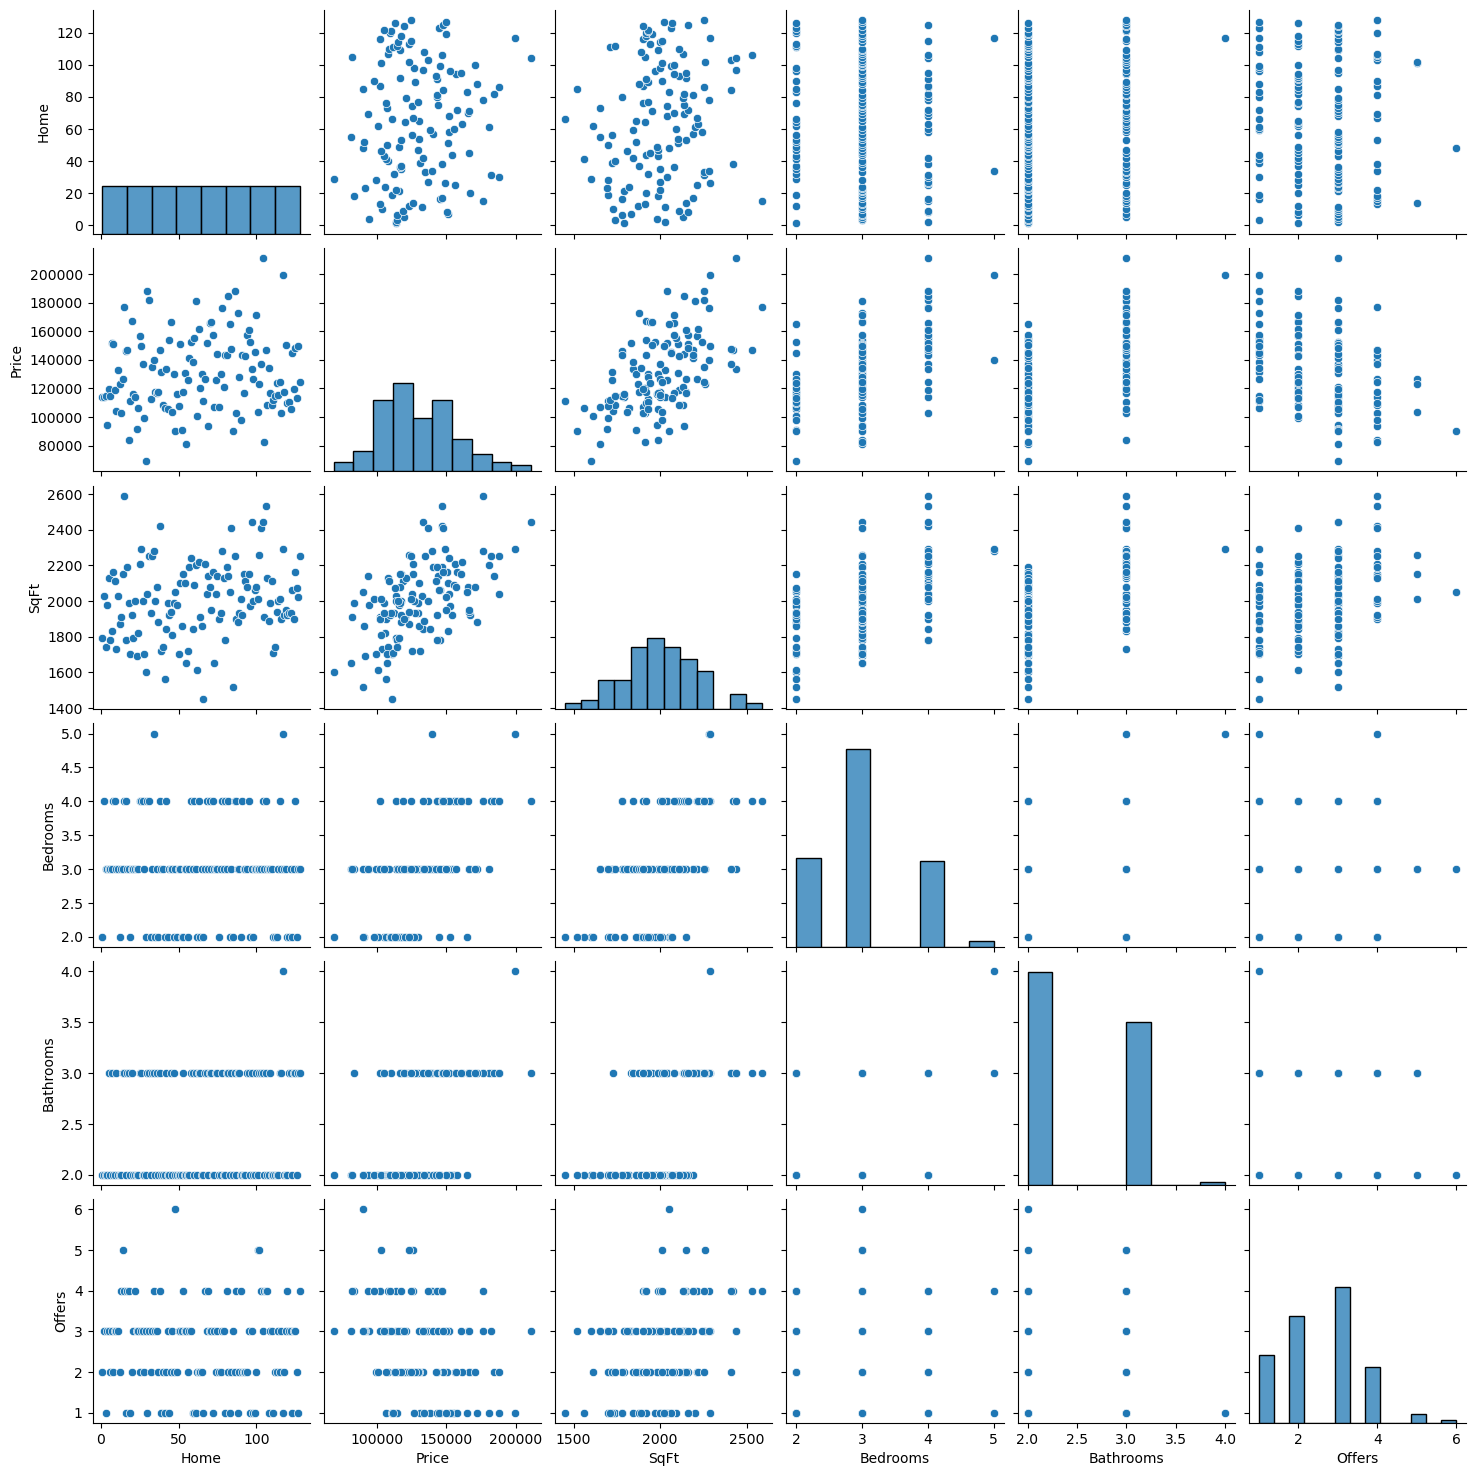

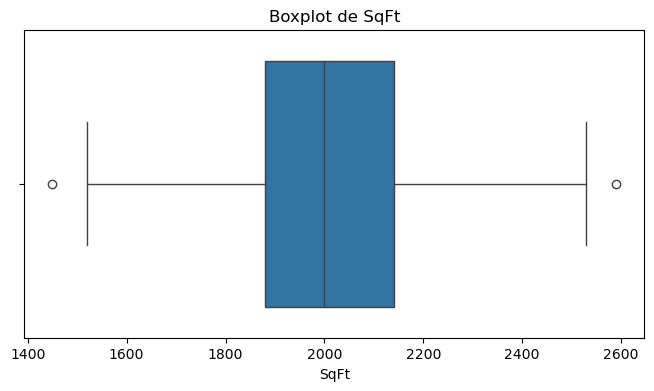

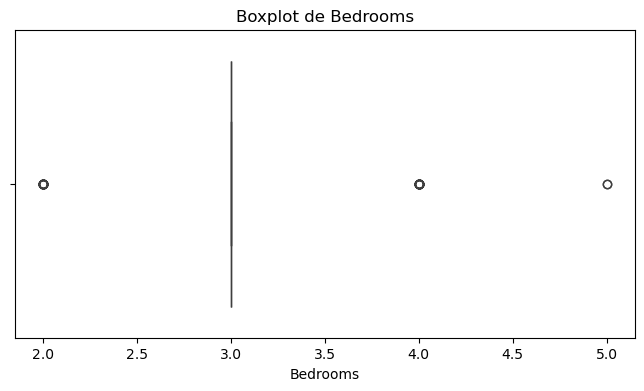

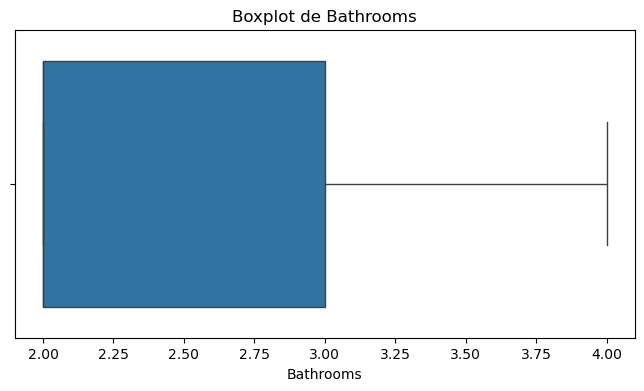

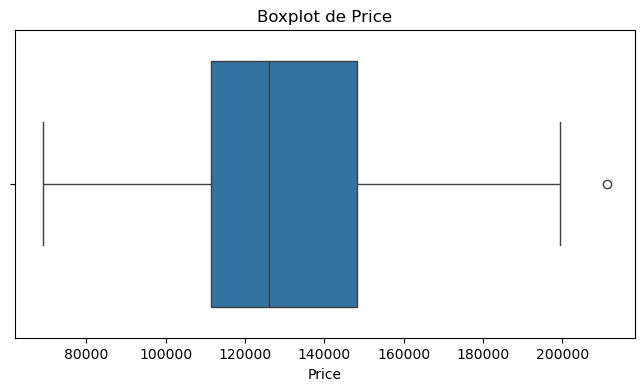

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comprobar valores nulos
print(df.isnull().sum())

# Visualizar distribuciones de características numéricas
sns.pairplot(df)
plt.show()

# Visualizar posibles outliers usando boxplots
for col in ['SqFt', 'Bedrooms', 'Bathrooms', 'Price']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

**2. Exploración de datos:** Realiza un análisis exploratorio de los datos para entender su estructura y detectar posibles problemas como valores nulos o outliers.

In [ ]:
## No hay valores Nulos

**3. Preparación de datos:** Divide los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).

In [5]:
from sklearn.model_selection import train_test_split

# Seleccionar características y variable objetivo
X = df[['SqFt', 'Bedrooms', 'Bathrooms']]
y = df['Price']

# Dividir en conjunto de entrenamiento y conjunto de prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

# Escalador
scaler = StandardScaler()

# Ajustar y transformar el conjunto de entrenamiento
X_train = scaler.fit_transform(X_train)

# Transformar el conjunto de prueba
X_test = scaler.transform(X_test)


**4. Entrenamiento del modelo:** Entrena un modelo de regresión lineal utilizando los datos de entrenamiento.

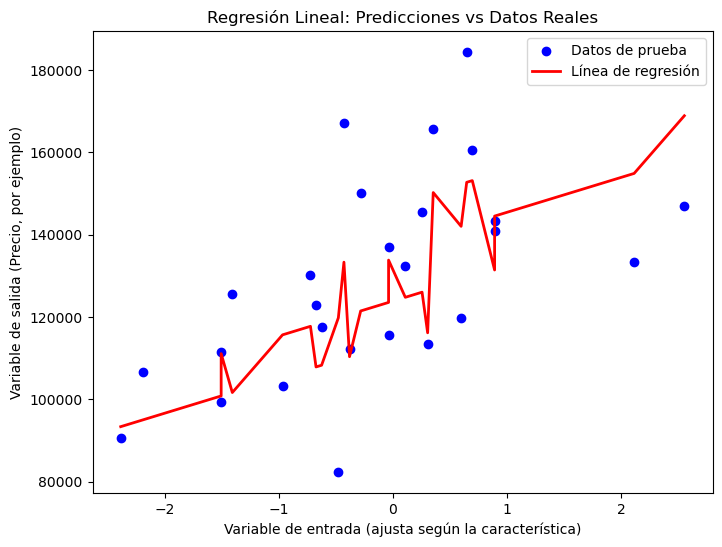

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Modelo de regresión lineal
model = LinearRegression()
# Ajustar el modelo (ya que tienes un modelo llamado 'model')
model.fit(X_train, y_train)

# Generar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Crear un gráfico que muestre la relación de regresión
plt.figure(figsize=(8, 6))

# Asegúrate de seleccionar una sola característica para el eje X si es necesario (ajusta según tu conjunto de datos)
plt.scatter(X_test[:, 0], y_test, color='blue', label='Datos de prueba')  # Cambia X_test[:, 0] según la característica que deseas visualizar

# Ordenar las predicciones para mostrar la línea de regresión correctamente
sorted_indices = np.argsort(X_test[:, 0])  # Ordenar por la característica que estás graficando
plt.plot(X_test[sorted_indices, 0], y_pred[sorted_indices], color='red', linewidth=2, label='Línea de regresión')

# Etiquetas y título
plt.xlabel('Variable de entrada (ajusta según la característica)')
plt.ylabel('Variable de salida (Precio, por ejemplo)')
plt.title('Regresión Lineal: Predicciones vs Datos Reales')
plt.legend()
plt.show()


**5. Evaluación del modelo:** Evalúa el modelo utilizando el conjunto de prueba. Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el MSE y R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R²): {r2}')

Error Cuadrático Medio (MSE): 320149938.23026806
Coeficiente de Determinación (R²): 0.456819577754888


**6. Predicción:** Usa el modelo entrenado para predecir el precio de una casa con las siguientes características:
* Tamaño: 2000 pies cuadrados

* Habitaciones: 3

* Baños: 2

In [9]:
# Características de la nueva casa
new_house = [[2000, 3, 2]]  # Tamaño: 2000, Habitaciones: 3, Baños: 2

# Escalar las características de la nueva casa usando el mismo escalador
new_house_scaled = scaler.transform(new_house)

# Predecir el precio de la nueva casa
predicted_price = model.predict(new_house_scaled)
print(f'El precio predicho para la casa es: ${predicted_price[0]:,.2f}')

El precio predicho para la casa es: $123,537.00


c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
